<a href="https://colab.research.google.com/github/oneryigit/Geospatial-Data-Analysis/blob/main/bulgaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt

In [ ]:
import os

# Get the current working directory
print("Current working directory:", os.getcwd())

# Change the current working directory
os.chdir("/content/drive/MyDrive/bulgaria_map")

# Verify the change
print("New working directory:", os.getcwd())

Current working directory: /content
New working directory: /content/drive/MyDrive/bulgaria_map


In [ ]:
df= pd.read_csv('data.csv')

df.head()

,gwid,statename,from,to,group,groupid,gwgroupid,umbrella,sqkm,type,the_geom
0,2,United States of America,1946,1958,Whites,1000,201000,NaN,7940038,Statewide,SRID=4326;MULTIPOLYGON (((-93.81889091978115 4...
1,2,United States of America,1946,1958,African Americans,3000,203000,NaN,1037020,Regional & urban,SRID=4326;MULTIPOLYGON (((-73.17778189969161 4...
2,2,United States of America,1946,1958,American Indians,5000,205000,NaN,939761,Regionally based,SRID=4326;MULTIPOLYGON (((-73.91164589888828 4...
3,2,United States of America,1959,1959,Whites,1000,201000,NaN,7940038,Statewide,SRID=4326;MULTIPOLYGON (((-93.81889091978115 4...
4,2,United States of America,1959,1959,African Americans,3000,203000,NaN,1037020,Regional & urban,SRID=4326;MULTIPOLYGON (((-73.17778189969161 4...


<Axes: >

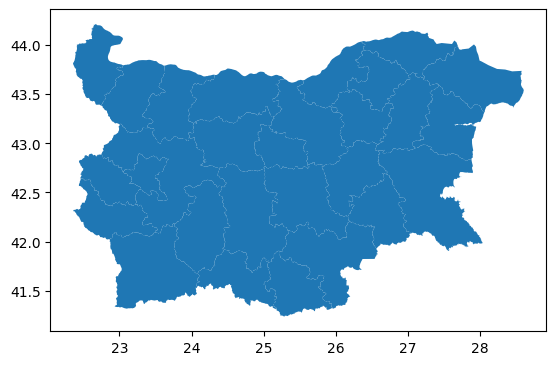

In [ ]:
bulgaria= gpd.read_file("bul_shape/bgr_admbnda_adm1_unicef_20221012.shp")

bulgaria.plot()

In [ ]:
muslim= pd.read_csv("/content/drive/MyDrive/bulgaria_map/bul_muslim.csv")

muslim

,Provinces,MuslimPop,Population2011,Percent
0,Blagoevgrad,"67,000","323,552",20.71
1,Burgas,"40,055","415,817",9.63
2,Dobrich,"8,200","189,677",4.32
3,Gabrovo,"35,000","122,702",28.52
4,Haskovo,"45,000","246,238",18.28
5,Kardzhali,"82,227","152,808",53.81
6,Kyustendil,"93,000","136,686",68.04
7,Lovech,"40,000","141,422",28.28
8,Montana,"12,000","148,098",8.10
9,Pazardzhik,"150,000","275,548",54.44


In [ ]:
muslim_geo=bulgaria.merge(muslim, left_on='ADM1_EN', right_on='Provinces')

In [ ]:
#Subseting Bulgaria

bulgar=df[df['statename']=='Bulgaria']

#I am not sure why EPR has 'SRID=4326' attached to the geometry column.
# So I deleted using regex. I am sure there is another way too.
bulgar['the_geom']=bulgar.the_geom.str.replace(r'SRID=4326;','')

#assigning geometry column from EPR
bulgar['the_geom']=gpd.GeoSeries.from_wkt(bulgar['the_geom'])
#creating geo DataFrame
bul_geo=gpd.GeoDataFrame(bulgar, geometry=bulgar['the_geom'], crs='EPSG:4326')

# where Turks are in Bulgaria
turk_bul= bul_geo[bul_geo.group=='Turkish']


<ipython-input-9-e9e72e9d67ff>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bulgar['the_geom']=bulgar.the_geom.str.replace(r'SRID=4326;','')
<ipython-input-9-e9e72e9d67ff>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bulgar['the_geom']=gpd.GeoSeries.from_wkt(bulgar['the_geom'])


In [ ]:

kurds=df[df['group']=='Kurds']

kurds['the_geom']=kurds.the_geom.str.replace(r'SRID=4326;','')

#assigning geometry column from EPR
kurds['the_geom']=gpd.GeoSeries.from_wkt(kurds['the_geom'])
#creating geo DataFrame
kurds_geo=gpd.GeoDataFrame(kurds, geometry=kurds['the_geom'], crs='EPSG:4326')


kurds_geo = kurds_geo.drop(index=[1108, 1103, 1075, 1088, 1113])

kurds_geo

<ipython-input-77-ebd23a0fd867>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kurds['the_geom']=kurds.the_geom.str.replace(r'SRID=4326;','')
<ipython-input-77-ebd23a0fd867>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kurds['the_geom']=gpd.GeoSeries.from_wkt(kurds['the_geom'])


,gwid,statename,from,to,group,groupid,gwgroupid,umbrella,sqkm,type,the_geom,geometry
1075,630,Iran (Persia),1946,2021,Kurds,8000,63008000,NaN,108455,Regional & urban,"MULTIPOLYGON (((61.06386 28.6685, 61.05754 28....","MULTIPOLYGON (((61.06386 28.6685, 61.05754 28...."
1084,640,Turkey (Ottoman Empire),1946,2021,Kurds,1000,64001000,NaN,177241,Regionally based,"MULTIPOLYGON (((43.33252 40.55212, 43.37311 40...","MULTIPOLYGON (((43.33252 40.55212, 43.37311 40..."
1088,645,Iraq,1946,2021,Kurds,1000,64501000,NaN,72420,Regional & urban,"MULTIPOLYGON (((43.91298 37.22659, 43.91298 37...","MULTIPOLYGON (((43.91298 37.22659, 43.91298 37..."
1113,652,Syria,1968,2021,Kurds,6000,65206000,NaN,22007,Regionally based,"MULTIPOLYGON (((41.83527 36.59888, 41.40305 36...","MULTIPOLYGON (((41.83527 36.59888, 41.40305 36..."


In [ ]:
bul_geo[bul_geo.group=='Turkish']

,gwid,statename,from,to,group,groupid,gwgroupid,umbrella,sqkm,type,the_geom,geometry
278,355,Bulgaria,1958,2021,Turkish,2000,35502000,NaN,9990,Regionally based,"MULTIPOLYGON (((28.24635 43.72922, 28.29413 43...","MULTIPOLYGON (((28.24635 43.72922, 28.29413 43..."


In [ ]:
# Load your shapefile
world = gpd.read_file('/content/drive/MyDrive/bulgaria_map/world_shape/IPUMSI_world_release2024.shp')


<Axes: >

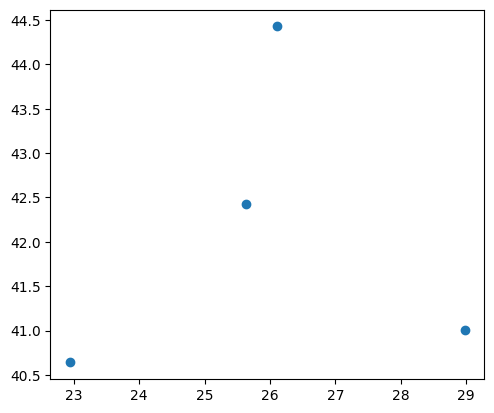

In [ ]:
# just search for latitude and longitude from google

cities={'city':['Turkey', 'Bulgaria', 'Greece', 'Romania'],
    'latitude':[41.008, 42.4258, 40.6401, 44.4268],
    'longitude':[28.978, 25.6345, 22.9444, 26.1025]}

cities_df=pd.DataFrame(cities)


#turn pandas dataframe into a geo dataframe.
city_geo = gpd.GeoDataFrame(cities_df,
                            geometry=gpd.points_from_xy(cities_df.longitude,cities_df.latitude),
                            crs="EPSG:4326")

city_geo.plot()

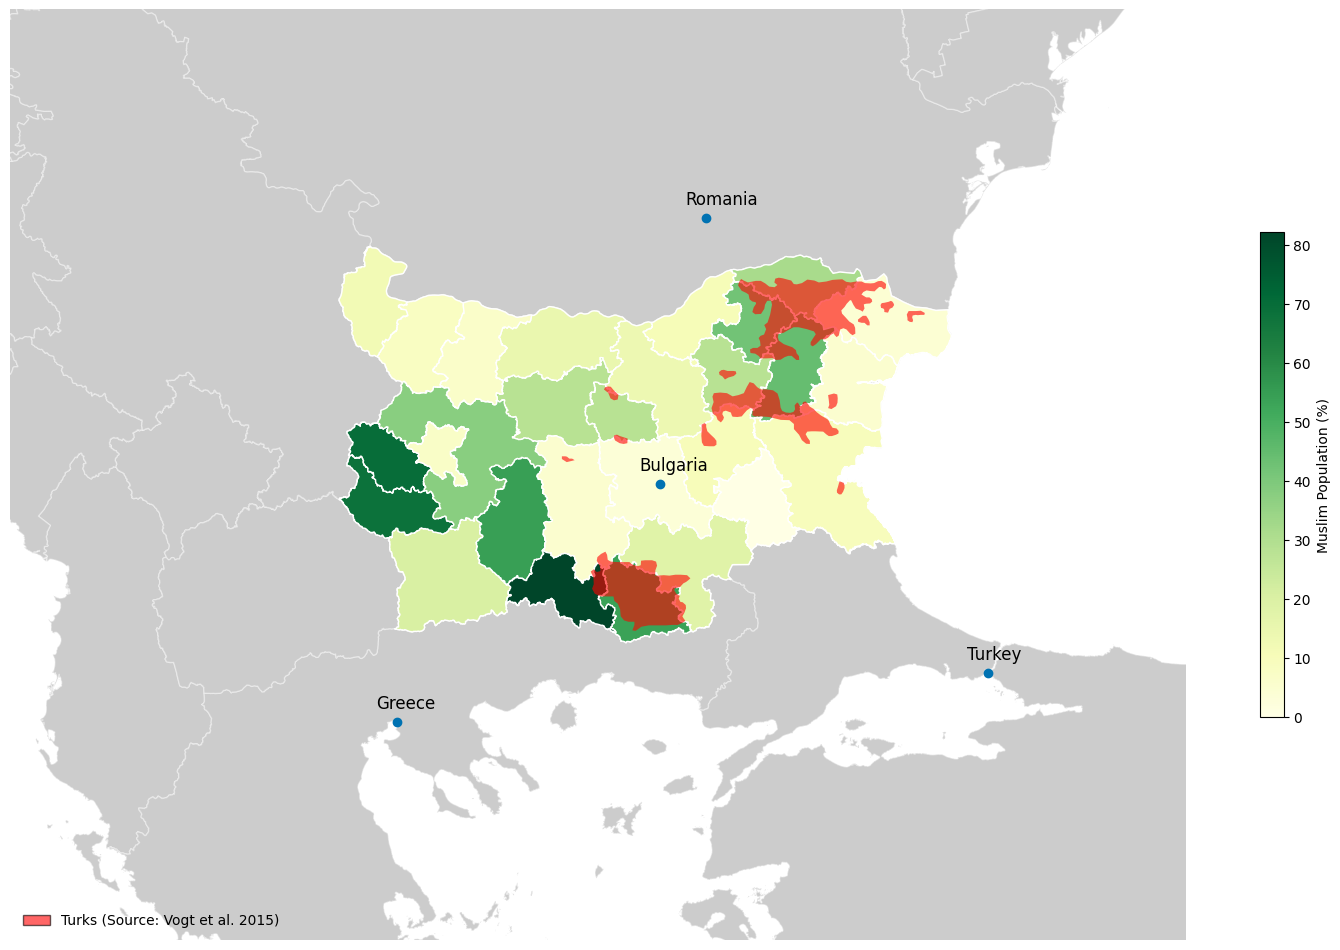

In [ ]:
plt.rcdefaults()


plt.style.use('seaborn-v0_8-colorblind')

fig, ax= plt.subplots(figsize=(15,10))

world.plot(ax=ax,color='gray',alpha=0.4, edgecolor='w') #World

bulgaria.plot(ax=ax, color='gray',alpha=0.5, edgecolor='w') #bulgaria

muslim_geo.plot(ax=ax, column='Percent', cmap='YlGn', edgecolor='w',legend=True,legend_kwds={'shrink': 0.5, 'label':'Muslim Population (%)'}) #bulgaria

turk_bul.plot(ax=ax, color='r', alpha=0.6) #turks



ax.axis([19,31, 39,46])

ax.set_axis_off()
ax.grid(False)

city_geo.plot(ax=ax)
for x, y, label in zip(city_geo.geometry.x, city_geo.geometry.y, city_geo.city):
    ax.annotate(label,size=12, xy=(x, y), xytext=(-15, 10), textcoords="offset points")


from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [Patch(facecolor='r', edgecolor='k',
                         label='Turks (Source: Vogt et al. 2015)', alpha=0.6)]
ax.legend(handles=legend_elements, loc='lower left', fontsize=10,shadow=False, frameon=False)


# plt.axis('off')
fig.tight_layout()
fig.set_facecolor("w")
plt.show()


# fig.savefig('Kurd_EPR_UCPD.pdf',bbox_inches='tight')
fig.savefig('Muslims_Bulgaria.png',bbox_inches='tight')


In [ ]:
turkey= gpd.read_file('/content/drive/MyDrive/bulgaria_map/turkey_shape/tur_polbnda_adm1.shp')

In [ ]:
turkey

,adm1_tr,adm1_en,adm1,Shape_Leng,Shape_Area,adm0_en,adm0_tr,adm0,geometry
0,ADANA,ADANA,TUR001,8.271786,1.407083,TURKEY,TÜRKİYE,TUR,"POLYGON ((36.31587 38.36376, 36.31769 38.36367..."
1,ADIYAMAN,ADIYAMAN,TUR002,5.494422,0.750561,TURKEY,TÜRKİYE,TUR,"POLYGON ((39.25297 38.18188, 39.25334 38.18159..."
2,AFYONKARAHİSAR,AFYONKARAHISAR,TUR003,7.149996,1.450064,TURKEY,TÜRKİYE,TUR,"POLYGON ((31.14797 39.26246, 31.15825 39.25753..."
3,AĞRI,AGRI,TUR004,6.588304,1.163170,TURKEY,TÜRKİYE,TUR,"POLYGON ((43.28706 40.01281, 43.29129 40.00884..."
4,AKSARAY,AKSARAY,TUR068,4.432509,0.790388,TURKEY,TÜRKİYE,TUR,"POLYGON ((33.96446 39.03804, 33.96453 39.03723..."
...,...,...,...,...,...,...,...,...,...
76,UŞAK,USAK,TUR064,3.864988,0.574221,TURKEY,TÜRKİYE,TUR,"POLYGON ((29.74957 38.92497, 29.75259 38.92385..."
77,VAN,VAN,TUR065,8.362708,2.159743,TURKEY,TÜRKİYE,TUR,"POLYGON ((43.86293 39.35519, 43.86625 39.3545,..."
78,YALOVA,YALOVA,TUR077,2.051652,0.087016,TURKEY,TÜRKİYE,TUR,"POLYGON ((29.5329 40.74757, 29.53292 40.73702,..."
79,YOZGAT,YOZGAT,TUR066,6.386410,1.436743,TURKEY,TÜRKİYE,TUR,"POLYGON ((35.38648 40.24666, 35.38896 40.24665..."


In [ ]:
sett= pd.read_csv("/content/drive/MyDrive/bulgaria_map/sett.csv")

sett.rename(columns={'Number of Houses': 'house'}, inplace=True)


sett


,City,house
0,ADANA,50
1,ANKARA,1566
2,BALIKESIR,500
3,BILECIK,116
4,BURSA,7258
5,CANAKKALE,21
6,EDIRNE,440
7,ERZURUM,40
8,ESKISEHIR,1344
9,ISTANBUL,5318


In [ ]:
turkey_sett=turkey.merge(sett, left_on='adm1_en', right_on='City', how= "outer" )
turkey_sett2=turkey.merge(sett, left_on='adm1_en', right_on='City')

turkey_sett2

,adm1_tr,adm1_en,adm1,Shape_Leng,Shape_Area,adm0_en,adm0_tr,adm0,geometry,City,house
0,ADANA,ADANA,TUR001,8.271786,1.407083,TURKEY,TÜRKİYE,TUR,"POLYGON ((36.31587 38.36376, 36.31769 38.36367...",ADANA,50
1,ANKARA,ANKARA,TUR006,11.822914,2.695686,TURKEY,TÜRKİYE,TUR,"POLYGON ((32.59386 40.75234, 32.5966 40.75193,...",ANKARA,1566
2,BALIKESİR,BALIKESIR,TUR010,12.315748,1.533685,TURKEY,TÜRKİYE,TUR,"MULTIPOLYGON (((26.63628 39.29918, 26.63606 39...",BALIKESIR,500
3,BİLECİK,BILECIK,TUR011,3.414508,0.441396,TURKEY,TÜRKİYE,TUR,"POLYGON ((30.023 40.42924, 30.02948 40.42895, ...",BILECIK,116
4,BURSA,BURSA,TUR016,6.138026,1.142279,TURKEY,TÜRKİYE,TUR,"MULTIPOLYGON (((28.53602 40.51414, 28.53451 40...",BURSA,7258
5,ÇANAKKALE,CANAKKALE,TUR017,9.260139,1.043731,TURKEY,TÜRKİYE,TUR,"MULTIPOLYGON (((26.0523 39.85003, 26.05736 39....",CANAKKALE,21
6,EDİRNE,EDIRNE,TUR022,5.941378,0.659075,TURKEY,TÜRKİYE,TUR,"POLYGON ((26.93362 42.00129, 26.93411 42.00103...",EDIRNE,440
7,ERZURUM,ERZURUM,TUR025,9.463435,2.639587,TURKEY,TÜRKİYE,TUR,"POLYGON ((42.12627 40.96439, 42.12989 40.96267...",ERZURUM,40
8,ESKİŞEHIR,ESKISEHIR,TUR026,6.644221,1.463839,TURKEY,TÜRKİYE,TUR,"POLYGON ((30.76429 40.15327, 30.77783 40.15241...",ESKISEHIR,1344
9,İSTANBUL,ISTANBUL,TUR034,8.478938,0.586618,TURKEY,TÜRKİYE,TUR,"MULTIPOLYGON (((29.14379 40.85561, 29.14381 40...",ISTANBUL,5318


In [ ]:

cities2={'city':['Turkey', 'Syria', 'Iran', 'Iraq','Armenia'],
    'longitude':[33.5597, 37.2765, 45.6786,44.3661, 44.5152],
    'latitude':[39.9334, 34.6138, 37.54982,34.3152,40.1872]}

cities_df2=pd.DataFrame(cities2)



#turn cities_df into a geo dataframe from xy coordinates.
city_geo2 = gpd.GeoDataFrame(cities_df2,
                            geometry=gpd.points_from_xy(cities_df2.longitude,cities_df2.latitude),
                            crs="EPSG:4326")

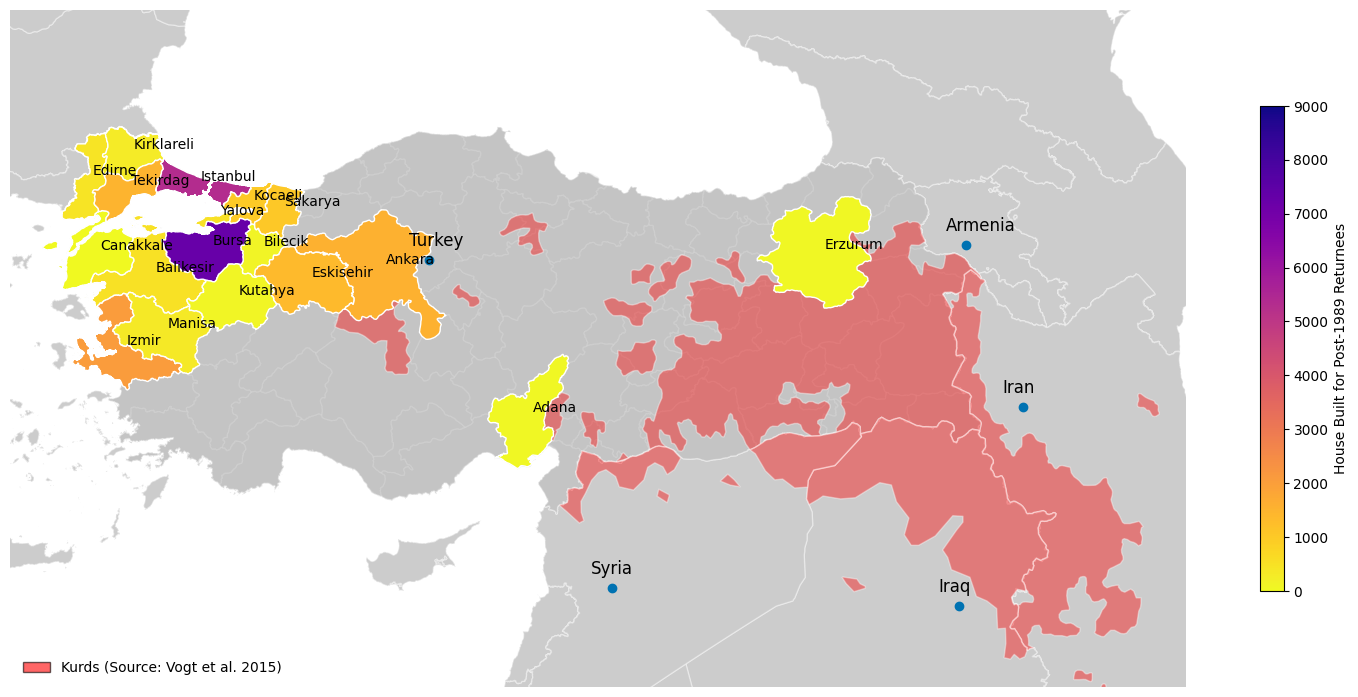

In [ ]:
plt.rcdefaults()


plt.style.use('seaborn-v0_8-colorblind')

fig, ax= plt.subplots(figsize=(15,10))

world.plot(ax=ax,color='gray', edgecolor='w', alpha=0.4) #World

turkey.plot(ax=ax,color='gray', edgecolor='w', alpha=0.1) #turkey

kurds_geo.plot(ax=ax, color='r', edgecolor='w',alpha=0.4) #Kurds

turkey_sett.plot(ax=ax, column='house', cmap='plasma_r', edgecolor='w',legend=True,legend_kwds={'shrink': 0.5, 'label':'House Built for Post-1989 Returnees'}, vmin=0, vmax=9000) #bulgaria


ax.axis([25,49, 33,44])

ax.set_axis_off()
ax.grid(False)


for idx, row in turkey_sett2.iterrows():
    # Calculate the centroid of each polygon
    centroid = row.geometry.centroid
    # Place the city name at the centroid position
    ax.annotate(row['adm1_en'].capitalize(), xy=(centroid.x, centroid.y), xytext=(3, 3), textcoords="offset points")

city_geo2.plot(ax=ax)
for x, y, label in zip(city_geo2.geometry.x, city_geo2.geometry.y, city_geo2.city):
    ax.annotate(label,size=12, xy=(x, y), xytext=(-15, 10), textcoords="offset points")


from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [Patch(facecolor='r', edgecolor='k',
                         label='Kurds (Source: Vogt et al. 2015) ', alpha=0.6)]
ax.legend(handles=legend_elements, loc='lower left', fontsize=10,shadow=False, frameon=False)


# plt.axis('off')
fig.tight_layout()
fig.set_facecolor("w")
plt.show()


fig.savefig('Kurd_Bulgar1989.png',bbox_inches='tight')
# fig.savefig('Muslims_Bulgaria.png',bbox_inches='tight')
